### Starting up glue

We start off by importing and running ``start_nbglue``, which will open up a small window that will show the datasets and subsets, as well as the selection mode toolbar:

In [1]:
%gui qt5

In [2]:
from nbglue import start_nbglue

In [3]:
nbglue = start_nbglue()

### Loading data

We can now add datasets to the session using ``add_data``. This can take either a filename:

In [4]:
table = nbglue.add_data('/Users/tom/Data/Tables/aj285677t2.fits')[0]

SUBSCRIBER <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828> 10
BEFORE HANDLER <bound method DataCollectionModel._on_add_data of <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828>> DataCollectionAddMessage: 
	 Sent from: DataCollection (1 data set)
	  0: aj285677t2[AJ285677T2]
AFTER HANDLER
END BROADCASTING


and can also take any arguments that would be valid for the ``qglue`` function, i.e. Numpy arrays, dictonaries of Numpy arrays, Astropy tables, HDU instances, and so on, provided that they are specified using keyword arguments:

In [5]:
import numpy as np
a = np.random.random((100,100))
b = np.random.random((100,100))
image = nbglue.add_data(test={'a': a, 'b': b})

SUBSCRIBER <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828> 10
BEFORE HANDLER <bound method DataCollectionModel._on_add_data of <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828>> DataCollectionAddMessage: 
	 Sent from: DataCollection (2 data sets)
	  0: aj285677t2[AJ285677T2]
	  1: test
AFTER HANDLER
END BROADCASTING


### Interactive Viewers (blocking)

We can now create simple viewers:

In [6]:
scatter = nbglue.scatter(table, 'RAdeg', 'DEdeg')

In [7]:
histogram = nbglue.histogram(nbglue.data_collection[0], '24mag')

By default, these viewers are not shown. To show a collection of viewers using a blocking dialog (that is, no further action will be possible in the notebook until the viewers are closed), you can use the ``show`` function. Once the viewers appear, you can make any selection as you would in glue, and you can deal with multiple selections using the data collection widget that popped up at the start. Once the viewers are closed, a static version of the plots is embedded into the notebook: 

SUBSCRIBER <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828> 10
BEFORE HANDLER <bound method DataCollectionModel._on_add_subset of <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828>> SubsetCreateMessage: 
	 Sent from: Subset: 1 (data: aj285677t2[AJ285677T2])
AFTER HANDLER
SUBSCRIBER <glue.viewers.scatter.client.ScatterClient object at 0x1217d00b8> 40
BEFORE HANDLER <bound method ScatterClient._add_subset of <glue.viewers.scatter.client.ScatterClient object at 0x1217d00b8>> SubsetCreateMessage: 
	 Sent from: Subset: 1 (data: aj285677t2[AJ285677T2])
AFTER HANDLER
SUBSCRIBER <glue.viewers.histogram.client.HistogramClient object at 0x124e0c320> 16
BEFORE HANDLER <bound method HistogramClient._add_subset of <glue.viewers.histogram.client.HistogramClient object at 0x124e0c320>> SubsetCreateMessage: 
	 Sent from: Subset: 1 (data: aj285677t2[AJ285677T2])
AFTER HANDLER
END BROADCASTING
SUBSCRIBER <glue.core.qt.data_collection_model.DataCo

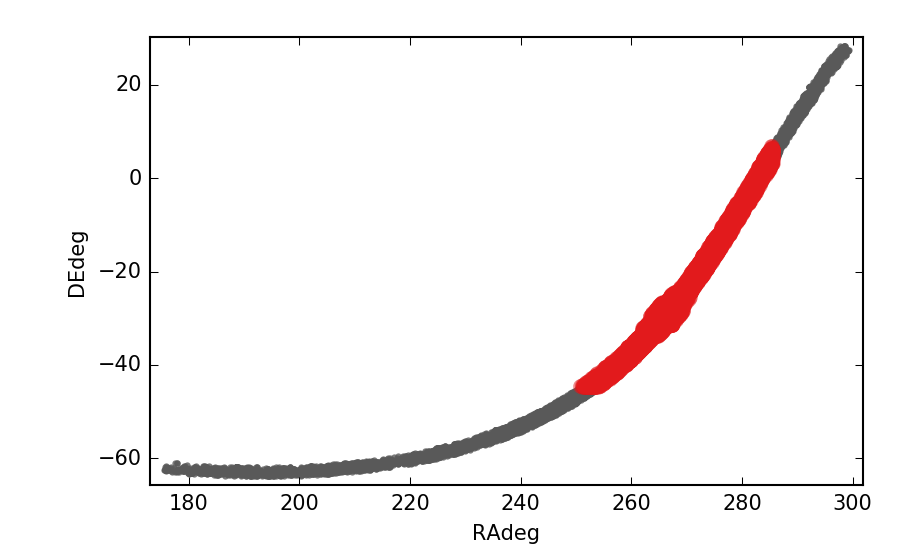

CLOSE EVENT
WE ARE AFTER


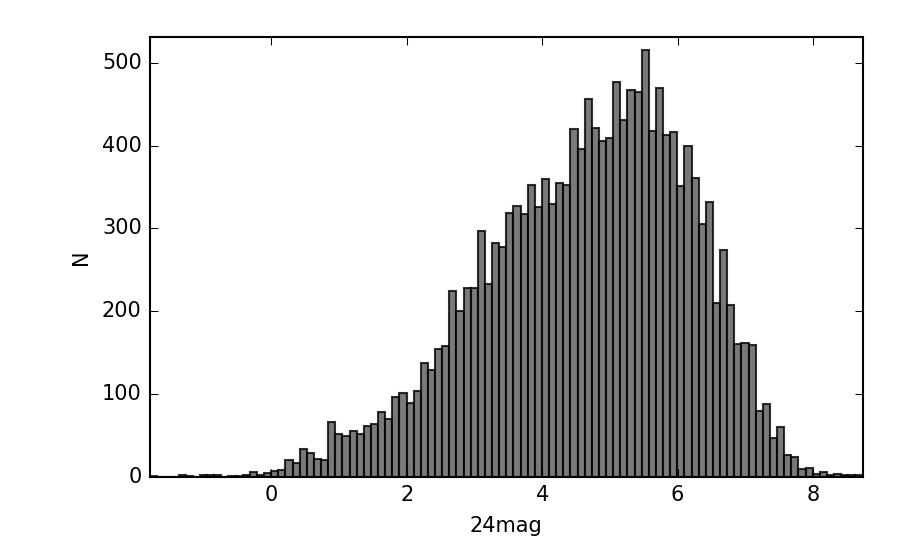

CLOSE EVENT
WE ARE AFTER


In [8]:
window = nbglue.show(scatter, histogram)

### Interactive viewers (non-blocking)

It is also possible to run the viewers in a non-blocking way. To do this, simply use the ``ishow`` function, which returns an object that can later be used to save a static image:

In [9]:
# Note that for now we need to make new viewers because the canvas get deleted when
# the previous plots were closed.
scatter = nbglue.scatter(table, 'RAdeg', 'DEdeg')
histogram = nbglue.histogram(nbglue.data_collection[0], '24mag')
viewers = nbglue.ishow(scatter, histogram)

One of the advantages of this is that it allows settings for the viewer to be changed interactively:

In [10]:
scatter.xatt = table.id['24mag']

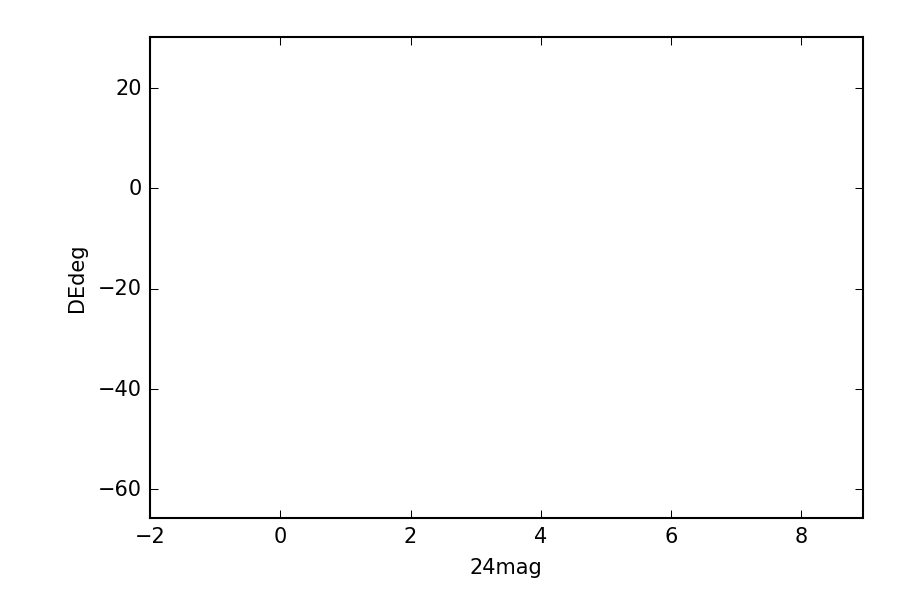

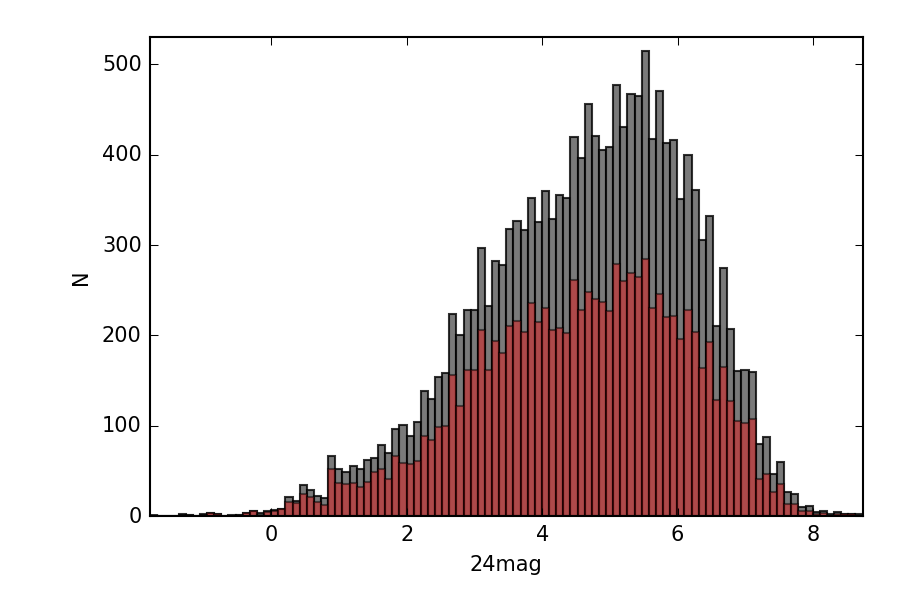

In [11]:
viewers.finalize()

### Programmatically making and accessing selections

The subsets are stored in the ``subsets`` attribute:

In [12]:
table.subsets

(Subset: 1 (data: aj285677t2[AJ285677T2]),)

and subsets can easily be converted to masks:

In [13]:
table.subsets[0].to_mask()

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Creating subsets is also possible using the standard glue API (could maybe be made easier):

In [14]:
subset = nbglue.add_selection('J > H', table.id['Jmag'] > table.id['Hmag'])
subset.style.color = 'purple'

SUBSCRIBER <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828> 10
BEFORE HANDLER <bound method DataCollectionModel._on_add_subset of <glue.core.qt.data_collection_model.DataCollectionModel object at 0x123222828>> SubsetCreateMessage: 
	 Sent from: Subset: J > H (data: aj285677t2[AJ285677T2])
AFTER HANDLER
SUBSCRIBER <glue.viewers.scatter.client.ScatterClient object at 0x124d86780> 35
BEFORE HANDLER <bound method ScatterClient._add_subset of <glue.viewers.scatter.client.ScatterClient object at 0x124d86780>> SubsetCreateMessage: 
	 Sent from: Subset: J > H (data: aj285677t2[AJ285677T2])
AFTER HANDLER
SUBSCRIBER <glue.viewers.histogram.client.HistogramClient object at 0x129561828> 16
BEFORE HANDLER <bound method HistogramClient._add_subset of <glue.viewers.histogram.client.HistogramClient object at 0x129561828>> SubsetCreateMessage: 
	 Sent from: Subset: J > H (data: aj285677t2[AJ285677T2])
AFTER HANDLER
END BROADCASTING
SUBSCRIBER <glue.core.qt.data_collection_

A detailed guide on interacting with data objects and subsets is provided [here](http://glueviz.org/en/stable/python_guide/data_tutorial.html)